In [287]:
import numpy as np
import pandas as pd
import re
import sklearn
import json
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [288]:
def read_meta_data(year, limit):
    with open('../meta_movie_data/{}/1.json'.format(str(year)), 'r') as json_data:
        data1 = json.load(json_data)
    df = pd.DataFrame.from_dict(data1, orient='index').transpose()
    df["id"] = 1

    for i in range (2, limit+1):
        try:
            with open('../meta_movie_data/{0}/{1}.json'.format(str(year),str(i)), 'r') as json_data:
                j = json_data.read().replace('\'', '\"')
                try:
                    data2 = json.loads(j)
                    df2 = pd.DataFrame.from_dict(data2, orient='index').transpose()
                    df2["id"] = i
                    df = df.append(df2)
                except:
                    print(sys.exc_info())
                    print(i)
        except:
            print(sys.exc_info())
            print(i)
    
    return df

In [289]:
def read_star_rating(year, limit): 
    with open('../eigacom_star_rating/{}/1.json'.format(str(year))) as json_data:
        data1 = json.load(json_data)
    df_eigagom_rating = pd.DataFrame.from_dict(data1, orient='index').transpose()
    df_eigagom_rating["id"] = 1

    for i in range (2, limit+1):
        try:
            with open('../eigacom_star_rating/{0}/{1}.json'.format(str(year),str(i))) as json_data:
                try:
                    data2 = json.load(json_data)
                    df2 = pd.DataFrame.from_dict(data2, orient='index').transpose()
                    df2["id"] = i
                    df_eigagom_rating = df_eigagom_rating.append(df2)
                except:
                    print(sys.exc_info())
                    print(i)
        except:
            print(sys.exc_info())
            print(i)
    return df_eigagom_rating

In [290]:
def read_data(year, limit):
    print(year)
    df1 = read_meta_data(year, limit)
    df2 = read_star_rating(year, limit)
    df = pd.merge(df1, df2, on='id')
    df["year"] = year
    df["month"] = df["release_date"].apply(lambda x: int(x.split("-")[1]))
    return  df

In [291]:
df_2018 = read_data(2018, 928)
df_2017 = read_data(2017, 320)
df_2016 = read_data(2016, 254)
df_2015 = read_data(2015, 290)
df_2014 = read_data(2014, 759)
df_2013 = read_data(2013, 662)

2018
(<class 'json.decoder.JSONDecodeError'>, JSONDecodeError("Expecting ',' delimiter: line 1 column 14 (char 13)",), <traceback object at 0x1a19f8db48>)
287
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x1a1a451508>)
357
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x1a1a8780c8>)
437
(<class 'json.decoder.JSONDecodeError'>, JSONDecodeError("Expecting ',' delimiter: line 1 column 152 (char 151)",), <traceback object at 0x1a19e2e1c8>)
521
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x1a1a806848>)
577
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x1a1a806388>)
585
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x1a1a1ab248>)
589
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'),

In [292]:
def add_nominated(df, nominated_list):
    df["nominated"] = 0
    for num in nominated_list:
        df.loc[df['id'] == num, 'nominated'] = 1

In [293]:
nominated_2018 = [314, 131, 206, 284, 269]
nominated_2017 = [217, 177, 229, 134, 202]
nominated_2016 = [153, 186, 61, 211, 102]
nominated_2015 = [107, 272, 278, 158]
nominated_2014 = [678, 42, 588, 603, 747]
nominated_2013 = [657, 454, 387, 470, 18, 187, 626]

ノミネート2018<br>
269 万引き家族<br>
314 カメラを止めるな<br>
131 北の桜守<br>
206 孤狼の血<br>
284 空飛ぶタイヤ<br>

ノミネート2017<br>
217 三度目の殺人<br>
177 君の膵臓を食べたい<br>
206 ナミヤ雑貨店の奇蹟<br>
134 花戦さ<br>
202 関ヶ原<br>

ノミネート2016<br>
153 シンゴジラ<br>
186 怒り<br>
61 家族はつらいよ<br>
211 湯を沸かすほどの熱い愛<br>
102 64-ロクヨン-前編<br>

ノミネート2015<br>
107 海街diary<br>
272 海難1890<br>
278 母と暮せば<br>
158 日本のいちばん長い日<br>

ノミネート2014<br>
747　(2015のノミネート) 百円の恋<br>
678 紙の月<br>
42 小さいおうち<br>
588 蜩ノ記<br>
603　ふしぎな岬の物語<br>

ノミネート2013<br>
657  永遠の0 (2014の最優秀賞)<br>
187  舟を編む<br>
454 凶悪<br>
387 少年H<br>
470 そして父になる<br>
18　東京家族<br>
626 利休にたずねよ	<br>

In [294]:
add_nominated(df_2018, nominated_2018)
add_nominated(df_2017, nominated_2017)
add_nominated(df_2016, nominated_2016)
add_nominated(df_2015, nominated_2015)
add_nominated(df_2014, nominated_2014)
add_nominated(df_2013, nominated_2013)

In [295]:
df_all = pd.concat([df_2018, df_2017, df_2016, df_2015, df_2014, df_2013])
drop_elements = ['title', 'director', 'scriptwriter', 'performers', 'release_date', 'id']
df_all = df_all.drop(drop_elements, axis = 1)
df_all['screen_time'] = df_all['screen_time'].astype(int)
df_all = pd.get_dummies(df_all, dummy_na=True)

In [296]:
train = pd.concat([df_2017, df_2016, df_2015, df_2014, df_2013])
test = df_2018

In [297]:
drop_elements = ['title', 'director', 'scriptwriter', 'performers', 'release_date', 'id']

In [298]:
train = df_all.loc[df_all["year"] != 2018]
test = df_all.loc[df_all["year"] == 2018]

In [299]:
# 入力データの作成
y_train = train['nominated'].ravel()
x_train = train.drop(['nominated', 'year'], axis=1)
features = x_train.columns
x_train = x_train.values # 学習データ

In [300]:
x_train.shape

(2266, 549)

In [301]:
# 入力データの作成
y_test = test['nominated'].ravel()
x_test = test.drop(['nominated', 'year'], axis=1)
x_test = x_test.values # テストデータ

In [302]:
x_test.shape

(907, 549)

In [341]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=10)
clf = clf.fit(x_train, y_train)

In [342]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)
pred = clf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
print("AUC: ")
print(auc(fpr, tpr))
print("accuracy_score: ")
print(accuracy_score(pred, y_test))

AUC: 
0.5878048780487805
accuracy_score: 
0.9713340683572216


In [343]:
print(len([i for i, x in enumerate(pred) if x == 1]))

23


In [344]:
df_2018_result = df_2018
df_2018_result["pred"] = pred

In [345]:
df_2018_result.loc[df_2018_result["nominated"] == 1]

,title,director,scriptwriter,performers,screen_time,production_studio,release_date,id,rating,check-in,review-count,year,month,nominated,pred
130,北の桜守,[滝田洋二郎],[那須真知子],"[吉永小百合, 堺雅人, 篠原涼子, 岸部一徳, 高島礼子, 永島敏行, 安田顕, 野間口徹...",126,東映,2018-03-10,131,3.1,1414.0,71.0,2018,3,1,0
204,孤狼の血,[白石和彌],[池上純哉],"[役所広司, 松坂桃李, 真木よう子, 滝藤賢一, 音尾琢真, 駿河太郎, 中村倫也, 中村...",126,東映,2018-05-12,206,3.8,8460.0,308.0,2018,5,1,0
267,万引き家族,[是枝裕和],[是枝裕和],"[リリー・フランキー, 安藤サクラ, 松岡茉優, 城桧吏, 佐々木みゆ, 池松壮亮, 山田裕...",120,ギャガ,2018-06-08,269,3.8,26907.0,729.0,2018,6,1,1
282,空飛ぶタイヤ,[本木克英],[林民夫],"[長瀬智也, ディーン・フジオカ, 高橋一生, 深田恭子, 岸部一徳, 笹野高史, 寺脇康文...",120,松竹,2018-06-15,284,3.5,10387.0,285.0,2018,6,1,0
311,カメラを止めるな!,[中泉裕矢],[上田慎一郎],"[真魚, 濱津隆之, しゅはまはるみ, 秋山ゆずき, ド・ランクザン望, チャールズ・グラバ...",57,,2018-06-23,314,4.0,27960.0,1040.0,2018,6,1,0


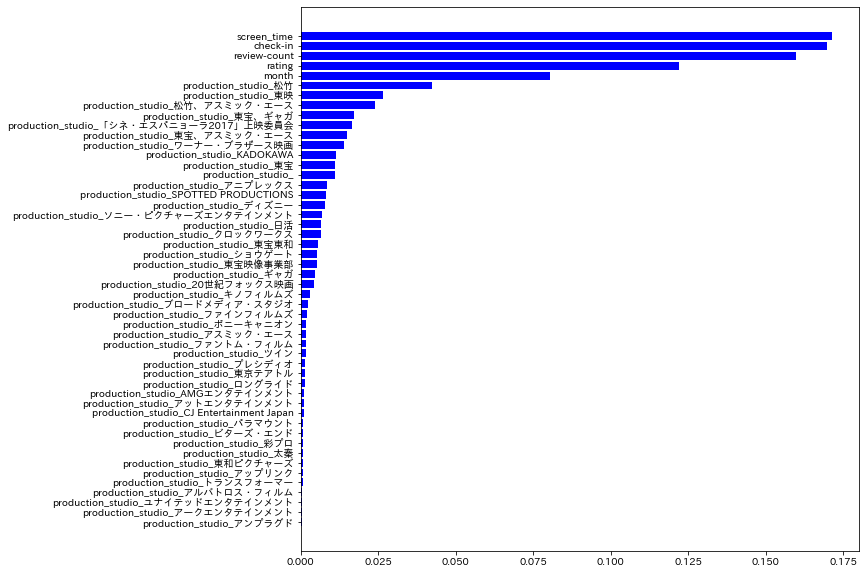

In [346]:
# feature importance
feature_imp = clf.feature_importances_
feature_imp_arg = np.argsort(feature_imp)
f_num = len(feature_imp_arg)
# rf
plt.rcParams["font.family"] = "IPAexGothic"
plt.figure(figsize=(10,10))
plt.barh(range(len(feature_imp_arg[f_num-50:])), feature_imp[feature_imp_arg[f_num-50:]], color='b', align='center')
plt.yticks(range(len(feature_imp_arg[f_num-50:])), features[feature_imp_arg[f_num-50:]])
plt.show()

In [347]:
df_2018_result["production_studio"]

0       silent voice
1                 松竹
2                   
3                ギャガ
4        20世紀フォックス映画
5            キノフィルムズ
6                 日活
7       AMGエンタテインメント
8               東北新社
9          ファインフィルムズ
10                  
11                  
12                  
13                日活
14                  
15            アクセスエー
16             トラヴィス
17                  
18           ギャガ・プラス
19                  
20      AMGエンタテインメント
21                  
22                  
23           ブロードウェイ
24                  
25           ブロードウェイ
26            ショウゲート
27         アスミック・エース
28                  
29                  
           ...      
877     ビーズインターナショナル
878        ガチンコ・フィルム
879          キノフィルムズ
880     AMGエンタテインメント
881     アークエンタテインメント
882           日本出版販売
883     ワーナー・ブラザース映画
884            ディズニー
885               東宝
886              ギャガ
887        ファインフィルムズ
888              彩プロ
889               東映
890                 
891                 
892         キュリオスコープ
893         ミ

In [ ]:
# XGBOOST
